# UAS MODEL DEPLOYMENT

## 2602075491 - BRANDON RITCHIE YANG

### Problem Understanding

Sebuah bank mengalami penurunan revenue karena ternyata banyak nasabah yang tidak berkeinginan invest dalam program deposit jangka panjang. Sehingga bank ingin mengidentifikasi pelanggan yang ada yang memiliki kesempatan lebih besar untuk berlangganan untuk deposit jangka panjang dan fokuskan upaya pemasaran pada pelanggan tersebut. Sehingga model machine learning dibutuhkan agar bisa memprediksi apakah seseorang memiliki kesempatan lebih besar untuk berlangganan atau tidak.

### Data Understanding

Pertama-tama hal yang dilakukan adalah mengimport library yang dibutuhkan seperti pandas, numpy dan matplotlib.pyplot. Selanjutnya data di baca menggunakan pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/BINUS/SEM_4/Model Deployment/UAS/data_1A.csv")

In [3]:
df.head(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,28,admin.,single,university.degree,no,yes,no,telephone,may,fri,1128.0,3,999,0,nonexistent,no
1,1,30,admin.,single,university.degree,no,no,no,cellular,may,thu,199.0,1,999,0,nonexistent,no
2,2,49,self-employed,divorced,university.degree,no,yes,no,cellular,jul,wed,1124.0,2,999,0,nonexistent,yes
3,3,33,management,married,high.school,no,yes,no,telephone,may,fri,178.0,2,999,0,nonexistent,no
4,4,50,services,married,unknown,unknown,no,no,telephone,may,tue,144.0,1,999,0,nonexistent,no
5,5,51,housemaid,divorced,high.school,no,yes,no,cellular,jul,thu,241.0,2,999,0,nonexistent,no
6,6,56,management,divorced,university.degree,no,no,no,cellular,sep,tue,277.0,1,999,1,failure,yes
7,7,38,admin.,married,unknown,no,yes,no,cellular,jul,wed,481.0,3,999,0,nonexistent,yes
8,8,30,services,single,high.school,no,no,no,cellular,nov,mon,104.0,2,999,0,nonexistent,no
9,9,49,admin.,divorced,university.degree,unknown,yes,yes,cellular,aug,fri,557.0,5,999,0,nonexistent,no


In [4]:
df.shape

(8237, 17)

In [5]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8228 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


Data memiliki jumlah kolom sebanyak 17 kolom dan entry data sebanyak 8237 entry dengan tipe kategorikal dan juga numerikal. Metadata: 

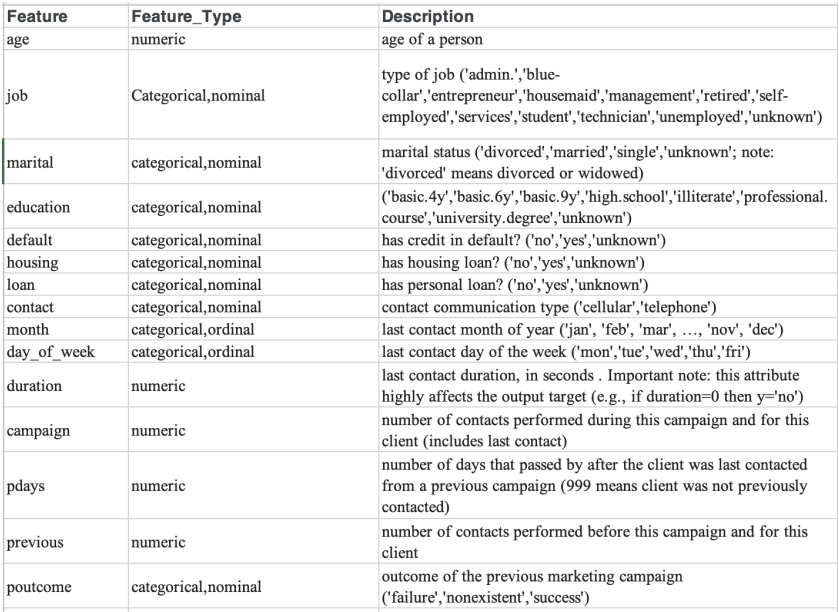

In [7]:
df.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous
count,8237.000000,8237.000000,8228.000000,8237.000000,8237.000000,8237.000000
mean,4118.000000,39.875926,259.756320,2.555663,962.719072,0.172757
std,2377.961417,10.305515,257.616697,2.768591,186.305694,0.499534
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,2059.000000,32.000000,104.000000,1.000000,999.000000,0.000000
50%,4118.000000,38.000000,180.000000,2.000000,999.000000,0.000000
75%,6177.000000,47.000000,320.000000,3.000000,999.000000,0.000000
max,8236.000000,88.000000,3509.000000,42.000000,999.000000,6.000000


In [8]:
df.isnull().sum()

Unnamed: 0     0
age            0
job            7
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Ketika dilihat informasi data menggunakan describe dan function isnull(). Terdapat beberapa missing value atau null value yang ada di kolom 'job' dan 'duration'. Ada 7 null value untuk kolom 'job' dan 9 null value untuk kolom 'duration'.

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0       1
5534    1
5500    1
5499    1
5498    1
       ..
2741    1
2740    1
2739    1
2738    1
8236    1
Name: Unnamed: 0, Length: 8237, dtype: int64


31    385
33    365
32    365
30    350
34    346
     ... 
79      3
88      2
74      2
86      2
84      1
Name: age, Length: 69, dtype: int64


admin.           2084
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
unknown            66
Name: job, dtype: int64


married     4942
single      2369
divorced     905
unknown       21
Name: marital, dtype: int64


university.degree      2506
high.school            1874
basic.9y               1206
professional.course    1022
basic.4y                807
basic.6y                462
unknown                 357
illiterate                3
Name: education, dtype: int64


no         6497
unknown    1740
Name: default, dtyp

Setelah melihat value counts dari setiap kolom yang ada di dalam data. Dapat diketahui bahwa kolom 'Unnamed: 0' merupakan index dari data (length: 8237) dan 'y' adalah kolom target.

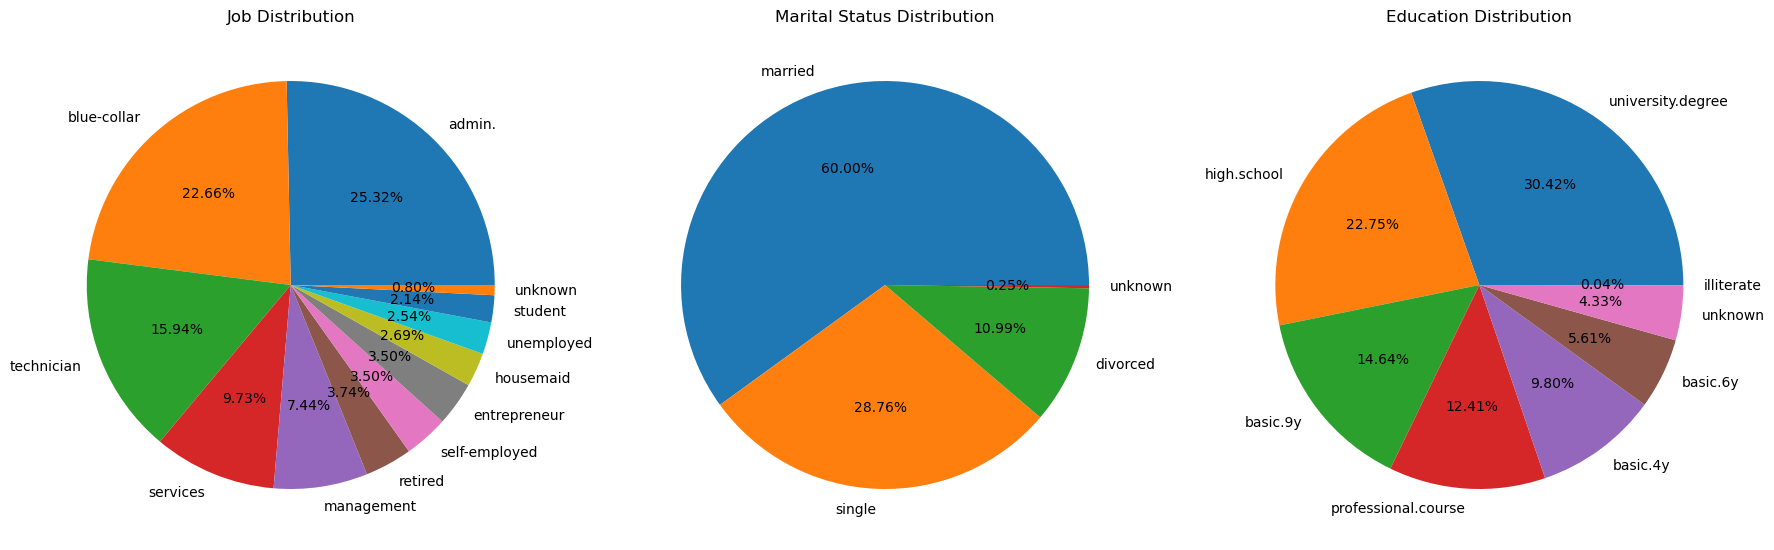

In [10]:
job_counts = df['job'].value_counts()
marital_counts = df['marital'].value_counts()
education_counts = df['education'].value_counts()

fig, axs = plt.subplots(1, 3, figsize = (18, 6))

axs[0].pie(job_counts, labels = job_counts.index, autopct = '%1.2f%%')
axs[0].set_title('Job Distribution')

axs[1].pie(marital_counts, labels = marital_counts.index, autopct = '%1.2f%%')
axs[1].set_title('Marital Status Distribution')

axs[2].pie(education_counts, labels = education_counts.index, autopct = '%1.2f%%')
axs[2].set_title('Education Distribution')

plt.tight_layout()
plt.show()

Chart Job Distribution: Melihat distribusi dari kolom 'job' dalam bentuk pie chart. Ada 3 'job' yang mendominasi kolom ini, yang pertama didominasi dengan admin. dengan 25.32% diikuti dengan blue-collar dengan 22.66%, lalu technician dengan 15.94%. Ada juga beberapa job seperti unknown, student, unemployed, housemaid, entrepreneur, self-employed dan retired yang memiliki nilai yang kecil (dibawah 5%).

Chart Marital Status Distribution: Distribusi dari kolom 'marital' didominasi dengan married sebesar 60% dan diikuti oleh single dengan 28.76% dan juga divorced sebesar 10.99% dan ada sebesar 0.25% yang tidak diketahui status maritalnya.

Chart Education Distribution: Distribusi dari kolom 'education' didominasi dengan university.degree dengan 30.42% dan diikuti oleh high.school sebesar 22.75%. Lalu dilanjutkan dengan basic.9y dengan 14.64%, professional.course dengan 12.41%, basic.4y dengan 9.80%, basic.6y dengan 5.61%, unknown dengan 4.33% dan yang terakhir illiterate dengan 0.04%.

In [11]:
df['job'] = df['job'].replace(['unknown', 'student', 'unemployed', 'housemaid', 'entrepreneur', 'self-employed', 'retired'], 'others')

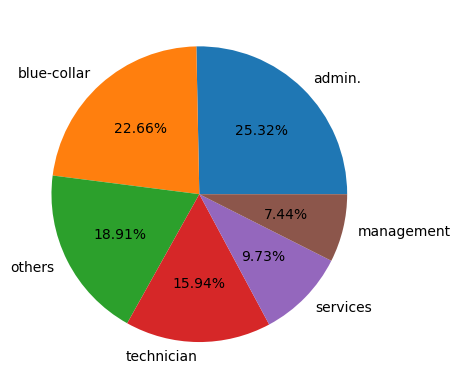

In [12]:
job_counts_new = df['job'].value_counts()

plt.pie(job_counts_new, labels = job_counts_new.index, autopct = '%1.2f%%')
plt.show()

Karena dengan adanya banyak data 'job' yang memiliki distribusi dibawah 5%, maka data data tersebut akan digabung dan dikelompokkan menjadi 'others'

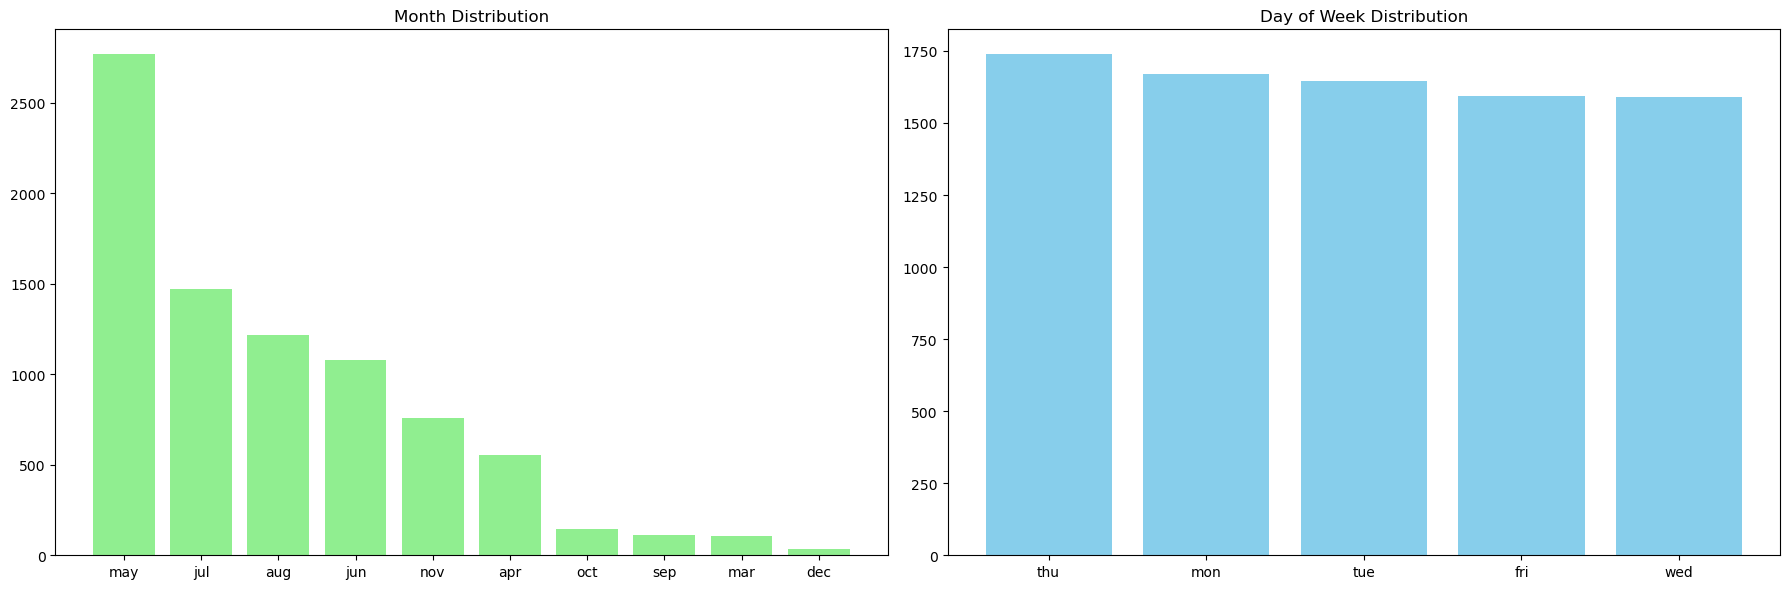

In [13]:
month_counts = df['month'].value_counts()
day_counts = df['day_of_week'].value_counts()

fig, axs = plt.subplots(1, 2, figsize = (18, 6))

axs[0].bar(month_counts.index, month_counts.values, color = 'lightgreen')
axs[0].set_title('Month Distribution')

axs[1].bar(day_counts.index, day_counts.values, color = 'skyblue')
axs[1].set_title('Day of Week Distribution')

plt.tight_layout()
plt.show()

Melihat distribusi dari kolom 'month' dan 'day_of_week'. Dalam kolom 'month', data terbanyak dimiliki oleh bulan may dengan lebih dari 2500 data, lalu diikuti oleh bulan july, augustus, dan juni dengan sekitar 1000 sampai 1500 data. Selanjutnya bulan november dan april dengan 500 sampai 1000 data, dan sisanya dibawah 500 data.

Dalam kolom 'day_of_week' terdapat 5 hari dari senin sampai selasa dengan jumlah data yang mirip untuk kelima data tersebut.

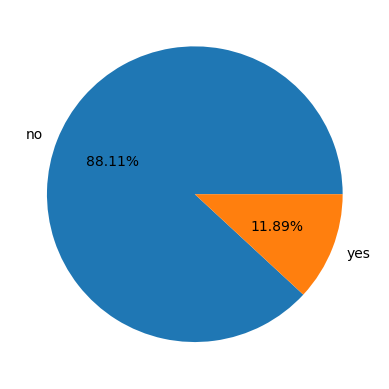

In [14]:
y_counts = df['y'].value_counts()

plt.pie(y_counts, labels = y_counts.index, autopct = '%1.2f%%')
plt.show()

Distribusi data target 'y' memiliki 88.11% untuk nilai no dan 11.89% untuk nilai yes. Data ini sangat tidak seimbang sehingga diperlukan tindakan lebih lanjut nantinya.

### Data Pre Processing

In [15]:
in_df = df.drop('y', axis = 1)
out_df = df['y']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(in_df, out_df, test_size = 0.2, random_state = 42)

print("Training set size: ", len(x_train), len(y_train))
print("Test set size: ", len(x_test), len(y_test))

print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test set:\n", y_test.value_counts(normalize=True))

Training set size:  6589 6589
Test set size:  1648 1648

Class distribution in training set:
 no     0.881014
yes    0.118986
Name: y, dtype: float64

Class distribution in test set:
 no     0.881675
yes    0.118325
Name: y, dtype: float64


Pada tahap pre processing, data displit menjadi 80% training dan 20% testing dengan menggunakan kolom 'y' sebagai target variable. Sehingga data yang didapat untuk training sebanyak 6589 dan untuk testing 1648 data.

In [17]:
x_train = x_train.drop('Unnamed: 0', axis = 1)
x_test = x_test.drop('Unnamed: 0', axis = 1)

Karena kolom 'Unnamed: 0' merupakan kolom index untuk data di dalam dataframe, maka kolom ini di drop karena tidak memiliki arti. Index sudah tertera di dalam dataframe sehingga tidak dibutuhkan kolom index.

In [18]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,46,blue-collar,married,basic.6y,unknown,yes,no,cellular,aug,tue,398.0,3,999,0,nonexistent
5899,30,management,single,high.school,no,no,no,cellular,nov,thu,952.0,2,999,0,nonexistent
5022,26,technician,single,professional.course,no,unknown,unknown,cellular,jul,wed,578.0,1,999,0,nonexistent
4556,48,blue-collar,married,basic.6y,no,yes,no,telephone,jun,mon,261.0,8,999,0,nonexistent
4139,31,others,single,unknown,no,no,yes,cellular,may,mon,535.0,2,999,0,nonexistent


In [19]:
y_train.head()

3805     no
5899    yes
5022    yes
4556     no
4139     no
Name: y, dtype: object

In [20]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

age            0
job            5
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64
age            0
job            2
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       2
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


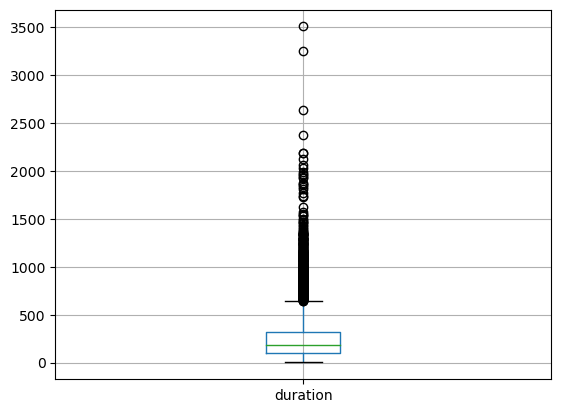

In [21]:
x_train.boxplot(column = ['duration'])
plt.show()

Boxplot untuk kolom 'duration' memperlihatkan adanya banyak outlier sehingga untuk mengisi null value untuk kolom 'duration' akan digunakan median.

In [22]:
import statistics as st
print('job: ',st.mode(x_train['job']))

job:  admin.


Untuk data kategorikal seperti 'job' pengisian null value dilakukan dengan cara mengisi modus dari data yaitu admin.

In [23]:
durationmedian = x_train['duration'].median()

x_train['job'].fillna('admin.', inplace = True)
x_test['job'].fillna('admin.', inplace = True)
x_train['duration'].fillna(durationmedian, inplace = True)
x_test['duration'].fillna(durationmedian, inplace = True)

In [24]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Setelah data null diisi, data menjadi bersih dan sudah tidak ada null value sehingga bisa digunakan untuk model training setelah dilakukan feature engineering.

### Feature Engineering

Encoding merupakan salah satu proses yang penting untuk dilakukan agar data bisa dibaca dan dipakai untuk model training. Data yang perlu diencode adalah data kategorikal (object, non numeric). Data tersebut akan diubah menjadi angka yang akan merepresentasikan nilai tersebut.

In [25]:
binary = {"contact":{"cellular":0, "telephone":1}}

x_train = x_train.replace(binary)
x_test = x_test.replace(binary)

Encode menggunakan metode Binary Encoding dilakukan untuk kolom 'contact' karena data dalam kolom tersebut hanya terdiri dari 2 nilai yang berbeda (biner) sehingga data ini akan diencode menggunakan metode Binary Encoding.

In [26]:
from sklearn import preprocessing

label_encoders = {
    'month': preprocessing.LabelEncoder(),
    'day_of_week': preprocessing.LabelEncoder()
}

x_train['month'] = label_encoders['month'].fit_transform(x_train['month'])
x_train['day_of_week'] = label_encoders['day_of_week'].fit_transform(x_train['day_of_week'])

x_test['month'] = label_encoders['month'].transform(x_test['month'])
x_test['day_of_week'] = label_encoders['day_of_week'].transform(x_test['day_of_week'])

Encode menggunakan metode Label Encoding dilakukan untuk kolom 'month' dan 'day_of_week' karena data dalam kolom tersebut memiliki lebih dari 2 nilai dan nilai tersebut merupakan nilai yang bersifat ordinal sehingga cocok untuk diencode menggunakan Label Encoding.

In [27]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
3805,46,blue-collar,married,basic.6y,unknown,yes,no,0,1,3,398.0,3,999,0,nonexistent
5899,30,management,single,high.school,no,no,no,0,7,2,952.0,2,999,0,nonexistent
5022,26,technician,single,professional.course,no,unknown,unknown,0,3,4,578.0,1,999,0,nonexistent
4556,48,blue-collar,married,basic.6y,no,yes,no,1,4,1,261.0,8,999,0,nonexistent
4139,31,others,single,unknown,no,no,yes,0,6,1,535.0,2,999,0,nonexistent


In [28]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe_encode = OneHotEncoder()

encode_train = x_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']]
encode_test = x_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']]

train_data = pd.DataFrame(ohe_encode.fit_transform(encode_train).toarray(), columns = ohe_encode.get_feature_names_out())
test_data = pd.DataFrame(ohe_encode.transform(encode_test).toarray(), columns=ohe_encode.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train = pd.concat([x_train, train_data], axis=1)
x_test = pd.concat([x_test, test_data], axis=1)

Encode menggunakan metode One Hot Encoding dilakukan untuk kolom sisanya yang merupakan kolom dengan data kategorikal. Ini dilakuka karena data pada kolom tersebut memiliki lebih dari 2 nilai dan nilai tersebut bukanlah nilai yang bersifat ordinal sehingga urutan angka label tidak mempengaruhi nilai tersebut sehingga One Hot Encoding dilakukan.

In [30]:
x_train.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3805,46,blue-collar,married,basic.6y,unknown,yes,no,0,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5899,30,management,single,high.school,no,no,no,0,7,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5022,26,technician,single,professional.course,no,unknown,unknown,0,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4556,48,blue-collar,married,basic.6y,no,yes,no,1,4,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4139,31,others,single,unknown,no,no,yes,0,6,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
x_test.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,706,48,others,married,university.degree,no,yes,no,1,6,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5325,30,services,single,high.school,no,no,no,1,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1665,21,others,single,high.school,no,no,no,0,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6675,46,management,married,basic.6y,no,no,no,0,6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5605,51,technician,married,professional.course,no,yes,no,1,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
x_train = x_train.drop(columns=['index', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'])
x_test = x_test.drop(columns=['index', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'])

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            6589 non-null   int64  
 1   contact                        6589 non-null   int64  
 2   month                          6589 non-null   int32  
 3   day_of_week                    6589 non-null   int32  
 4   duration                       6589 non-null   float64
 5   campaign                       6589 non-null   int64  
 6   pdays                          6589 non-null   int64  
 7   previous                       6589 non-null   int64  
 8   job_admin.                     6589 non-null   float64
 9   job_blue-collar                6589 non-null   float64
 10  job_management                 6589 non-null   float64
 11  job_others                     6589 non-null   float64
 12  job_services                   6589 non-null   f

In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1648 non-null   int64  
 1   contact                        1648 non-null   int64  
 2   month                          1648 non-null   int32  
 3   day_of_week                    1648 non-null   int32  
 4   duration                       1648 non-null   float64
 5   campaign                       1648 non-null   int64  
 6   pdays                          1648 non-null   int64  
 7   previous                       1648 non-null   int64  
 8   job_admin.                     1648 non-null   float64
 9   job_blue-collar                1648 non-null   float64
 10  job_management                 1648 non-null   float64
 11  job_others                     1648 non-null   float64
 12  job_services                   1648 non-null   f

Setelah melakukan encoding, data sudah dalam bentuk numerical dan bukan kategorikal lagi. Sehingga data bisa digunakan untuk model training.

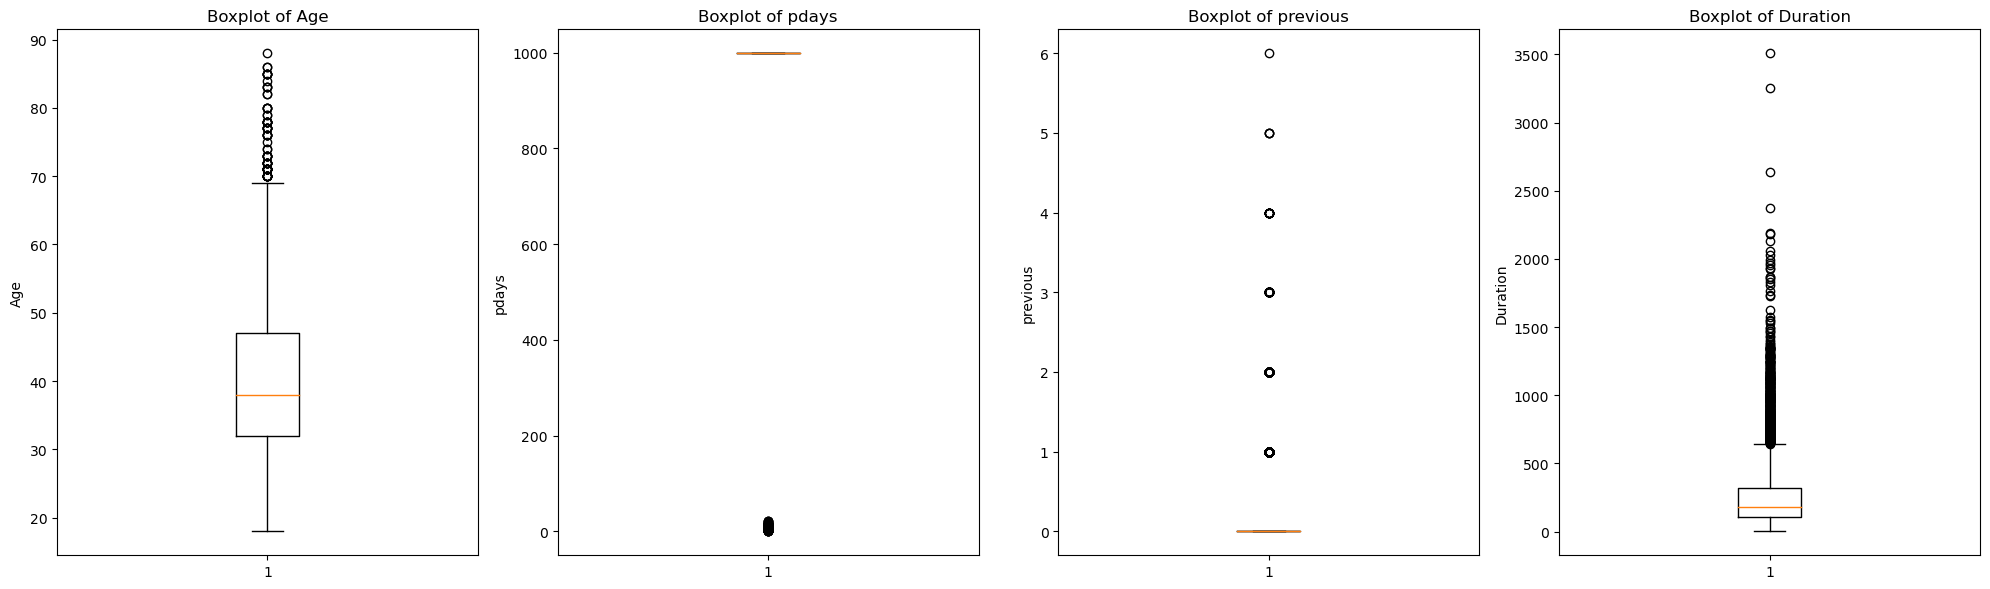

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
plt.boxplot(x_train['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

plt.subplot(1, 4, 2)
plt.boxplot(x_train['pdays'])
plt.title('Boxplot of pdays')
plt.ylabel('pdays')

plt.subplot(1, 4, 3)
plt.boxplot(x_train['previous'])
plt.title('Boxplot of previous')
plt.ylabel('previous')

plt.subplot(1, 4, 4)
plt.boxplot(x_train['duration'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration')

plt.tight_layout()
plt.show()

In [36]:
x_train.columns

Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_management',
       'job_others', 'job_services', 'job_technician', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(x_train[x_train.columns])
x_test_scaled = scaler.transform(x_test[x_test.columns])

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = x_test.columns)

Sebelum training model, data dilakukan scaling untuk menormalisasi data sehingga data memiliki rentang nilai yang sebanding dan tidak berat sebelah. Scaling dilakukan dengan metode Robust Scaling dikarenakan adanya banyak outlier dan Robust Scaler cocok digunakan untuk menormalisasi data ketika ada banyak outlier.

In [38]:
x_train_scaled_df.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.533333,0.0,-1.000000,0.5,1.004630,0.5,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.533333,0.0,1.000000,0.0,3.569444,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.800000,0.0,-0.333333,1.0,1.837963,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0
3,0.666667,1.0,0.000000,-0.5,0.370370,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.466667,0.0,0.666667,-0.5,1.638889,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0


In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_train_scaled_df, y_train = smote.fit_resample(x_train_scaled_df, y_train)

In [40]:
x_train_scaled_df.shape

(11610, 37)

In [41]:
y_train.value_counts()

no     5805
yes    5805
Name: y, dtype: int64

Menggunakan teknik Oversampling dengan metode SMOTE untuk meningkatkan dan memperbanyak jumlah data minoritas sehingga data bisa menjadi seimbang diantara kedua kelas. Metode ini dilakukan dengan cara membuat data sintetik atau menduplikat data yang sudah ada sehingga model bisa belajar dari kelas minoritas.

### Modelling

In [42]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 5)
RF_class.fit(x_train_scaled_df, y_train)

RandomForestClassifier(max_depth=5)

Menggunakan Random Forest untuk model pertama karena merupakan salah satu model yang paling sering digunakan banyak orang. Parameter yang digunakan ada 3, yang pertama n_estimators yang merupakan jumlah pohon dengan nilai 100, lalu criterion merupakan function untuk mengukur kualitas split di dalam pohon, dalam model ini menggunakan gini. Terakhir max_depth adalah maksimum kedalaman pohon dengan jumlah 5 untuk mencegah overfitting.

In [43]:
y_predict_rf = RF_class.predict(x_test_scaled_df)

In [44]:
from sklearn.metrics import classification_report
print('\nClassification Report Random Forest:\n')
print(classification_report(y_test, y_predict_rf, target_names = ['no','yes']))


Classification Report Random Forest:

              precision    recall  f1-score   support

          no       0.96      0.84      0.90      1453
         yes       0.39      0.77      0.52       195

    accuracy                           0.83      1648
   macro avg       0.68      0.81      0.71      1648
weighted avg       0.90      0.83      0.85      1648



Setelah data test di predict menggunakan model Random Forest yang sudah di train, f1 score yang didapatkan untuk nilai 'no' mencapai 90% dengan nilai precision sebesar 96% dan recall sebesar 85%. Sedangkan untuk nilai 'yes' f1 score yang didapatkan hanya mencapai 53% dengan nilai precision sebesar 40% dan recall sebesar 75%. Ini menandakan teknik oversampling yang digunakan masih kurang maksimal sehingga nilai precision untuk 'yes' masih rendah, akan tetapi nilai recall untuk 'yes' sudah lumayan tinggi sehingga model bisa dibilang sudah cukup bagus. Recall dilihat karena dalam kasus ini, false negative yang harus diminimalkan.

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

SVM_class = make_pipeline(SVC(gamma = 'auto'))
SVM_class.fit(x_train_scaled_df, y_train)

Pipeline(steps=[('svc', SVC(gamma='auto'))])

Menggunakan SVM untuk model kedua dengan parameter yang digunakan adalah gamma, gamma merupakan parameter yang mengontrol pengaruh dari satu contoh training, gamma dipakai dengan nilai auto sehingga bisa secara otomatis menentukan nilainya sendiri berdasarkan data input.

In [46]:
y_predict_svm = SVM_class.predict(x_test_scaled_df)

In [47]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_svm, target_names = ['no', 'yes']))


Classification Report

              precision    recall  f1-score   support

          no       0.97      0.83      0.90      1453
         yes       0.40      0.84      0.54       195

    accuracy                           0.83      1648
   macro avg       0.69      0.83      0.72      1648
weighted avg       0.91      0.83      0.85      1648



Setelah data test di predict menggunakan model SVM yang sudah di train, f1 score yang didapatkan untuk nilai 'no' mencapai 90% dengan nilai precision sebesar 97% dan recall sebesar 83%. Sedangkan untuk nilai 'yes' f1 score yang didapatkan hanya mencapai 54% dengan nilai precision sebesar 40% dan recall sebesar 84%. Ini masih menandakan teknik oversampling yang digunakan masih kurang maksimal sehingga nilai precision untuk 'yes' masih rendah, akan tetapi nilai recall untuk 'yes' sudah lumayan tinggi sehingga model bisa dibilang sudah cukup bagus. Recall dilihat karena dalam kasus ini, false negative yang harus diminimalkan.

Dengan adanya perbandingan dari kedua model tersebut, dapat disimpulkan bahwa model yang akan digunakan adalah model SVM dengan nilai yang sedikit lebih tinggi dari model Random Forest.

In [48]:
import pickle as pkl

filename_binary = 'binary_encode.pkl'
pkl.dump(binary, open(filename_binary, 'wb'))

filename_label = 'label_encode.pkl'
pkl.dump(label_encoders, open(filename_label, 'wb'))

filename_ohe = 'ohe_encode.pkl'
pkl.dump(ohe_encode, open(filename_ohe, 'wb'))

filename_scale = 'scaler.pkl'
pkl.dump(scaler, open(filename_scale, 'wb'))

filename_model = 'model.pkl'
pkl.dump(SVM_class, open(filename_model, 'wb'))

Encoder (binary, label dan one hot), Scaler dan Model di save dan export dalam file pickle untuk digunakan di dalam proses model deployment.

Link Video Penjelasan: https://binusianorg-my.sharepoint.com/personal/brandon_yang_binus_ac_id/_layouts/15/guestaccess.aspx?share=EVMshn6Pj-RApN1MBy46eo0B_5YKY9afl0_Y02yMDzbsNg&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=OZNmkJ